# Thermal particle distribution in ZPIC EM codes

This notebook illustrates thermal particle injection in ZPIC. All electromagnetic codes in ZPIC are fully relativistic and the codes work with the generalized velocity $\vec{u}$, defined as $\vec{u} = \gamma \vec{v}$, where $\gamma$ is the relativistic Lorentz factor, and $\vec{v}$ is the velocity.

When initializing a particle species, the user may specify a thermal generalized velocity, $\vec{u}_{th}$ such that the code will initialize the initial generalized velocity of simulation particles according to the following distribution:

$$
n\left( \vec{u} \right) \propto e^{ -\frac{1}{2} \left( \frac{u_x^2}{u_{thx}^2} + \frac{u_y^2}{u_{thy}^2} + \frac{u_y^2}{u_{thy}^2} \right) }
$$

(The constants were omitted for clarity).

Since we will be injected a limited number of particles in each simulation cell this procedure will cause a non-zero net momentum to be initialized. To avoid this, and to avoid initializing spurious oscillations, we do an additional step. For every simulation cell, we calculate the average momentum of the particles in that cell, and subtract this value from the particule generalized velocity. Note this does not affect the width of the distribution inside each cell, but rather shifts it to make sure it is centered about 0.

To illustrate the initialization of thermal particles in ZPIC we initialize a simulation with a single species and $\vec{u}_{th} = c \hat{x}$:


In [1]:
import em1d as zpic
import numpy as np
import matplotlib.pyplot as plt

nx = 128
lx = 12.8
dt = 0.05

ppc = 1000
uth = [1.00,0.0,0.0]

electrons = zpic.Species( "electrons", -1.0, ppc, uth = uth )
sim = zpic.Simulation( nx, box = lx, dt = dt, species = electrons )


We use a high (1000) number of particles per cell to improve the statistics. The distribution of the particle generalized velocities along $x$, $u_x$ can be easily plotted (blue bars):

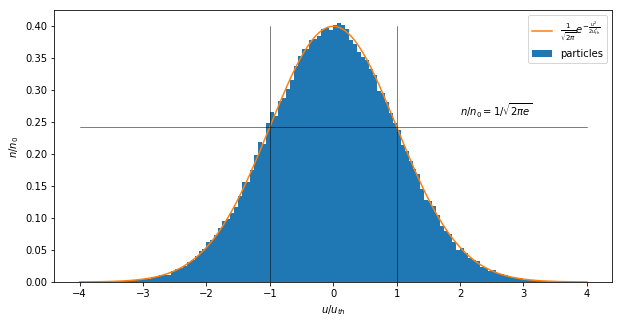

In [17]:
umax = 4
nbins = 128


plt.figure(figsize=(10,5))


urange = np.linspace(-umax, umax, num = nbins)
plt.hist( electrons.particles['ux'], bins = nbins, range = (-umax, umax), density = True, label ='particles' )
plt.plot( urange, np.exp(-0.5*urange**2)/np.sqrt(2*np.pi), label = r'$\frac{1}{\sqrt{2 \pi}}e^{-\frac{u^2}{2 u_{th}^2}}$' )

plt.plot( (-umax,+umax),(1.0/ np.sqrt(2 * np.pi * np.e),1.0/ np.sqrt(2 * np.pi * np.e)), color = 'k', linewidth = 0.5  )
plt.plot( (-1,-1),(0,1.0/np.sqrt(2*np.pi)), color = 'k', linewidth = 0.5  )
plt.plot( (+1,+1),(0,1.0/np.sqrt(2*np.pi)), color = 'k', linewidth = 0.5  )

plt.text( 2.0, 0.26,'$ n/n_0 = 1/\sqrt{2 \pi e} $')

plt.xlabel("$ u / u_{th} $")
plt.ylabel("$ n / n_0 $")

plt.legend()
plt.show()

The data has been normalized so that integrating over all phasespace gives 1. In the above plot, we also added the expected distribution function (orange line), with the same normalization:

$$
\frac{n(u_x)}{n_0} = \frac{1}{\sqrt{2 \pi}} e^{ - \frac{u_x^2}{2 \, u_{thx}^2}}
$$

